## **Clasificación utilizando XGBoost (Core)**

### **Objetivo:**
Implementar un pipeline completo de machine learning para un problema de clasificación utilizando XGBoost. Se hará especial énfasis en el Análisis Exploratorio de Datos (EDA), preprocesamiento, entrenamiento del modelo y optimización de hiperparámetros.

### **Descripción del Dataset:**
El dataset de enfermedades del corazón de la UCI contiene información sobre varios factores de riesgo asociados con enfermedades cardíacas. El objetivo es predecir la presencia de enfermedad cardíaca basándose en estos factores.

### **Instrucciones:**

### **Parte 1:** Carga y Exploración Inicial de Datos

- ***Carga del Dataset:***

    - Cargar el dataset desde Kaggle.

- ***Exploración Inicial:***

    - Revisar la estructura del dataset.

    - Describir las variables y su distribución.

    - Identificar y documentar valores faltantes y outliers.


### **Parte 2:** Análisis Exploratorio de Datos (EDA)

- ***Análisis Estadístico Descriptivo:***

    - Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.).

    - Analizar la distribución de las variables categóricas.

- ***Visualizaciones:***

    - Crear histogramas y gráficos de barras para entender la distribución de las variables.

    - Crear un mapa de calor para visualizar las correlaciones entre las variables.

    - Utilizar gráficos de dispersión para identificar posibles relaciones entre las variables.

- ***Valores Faltantes y Outliers:***

    - Detectar y tratar valores faltantes.

    - Identificar y manejar outliers.


### **Parte 3:** Preprocesamiento de Datos

- ***Transformación de Columnas:***

    - Codificar variables categóricas utilizando One-Hot Encoding.

    - Escalar características numéricas utilizando StandardScaler.

- ***División del Conjunto de Datos:***

    - Dividir el dataset en conjuntos de entrenamiento y prueba.


### **Parte 4:** Implementación de XGBoost

- ***Entrenamiento del Modelo:***

    - Entrenar un modelo de XGBoost con hiperparámetros básicos.

    - Evaluar el modelo utilizando métricas de rendimiento como la exactitud, precisión, recall, F1-Score y ROC-AUC.

- ***Optimización de Hiperparámetros:***

    - Utilizar GridSearchCV para optimizar los hiperparámetros del modelo de XGBoost.

- ***Evaluación del Modelo Optimizado:***

    - Evaluar el rendimiento del modelo optimizado y compararlo con el modelo inicial.


Columnas eliminadas: ['id']

--- Exploración Inicial del Dataset ---
Shape del dataset: (920, 15)

Primeras filas del dataset:
   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             nor

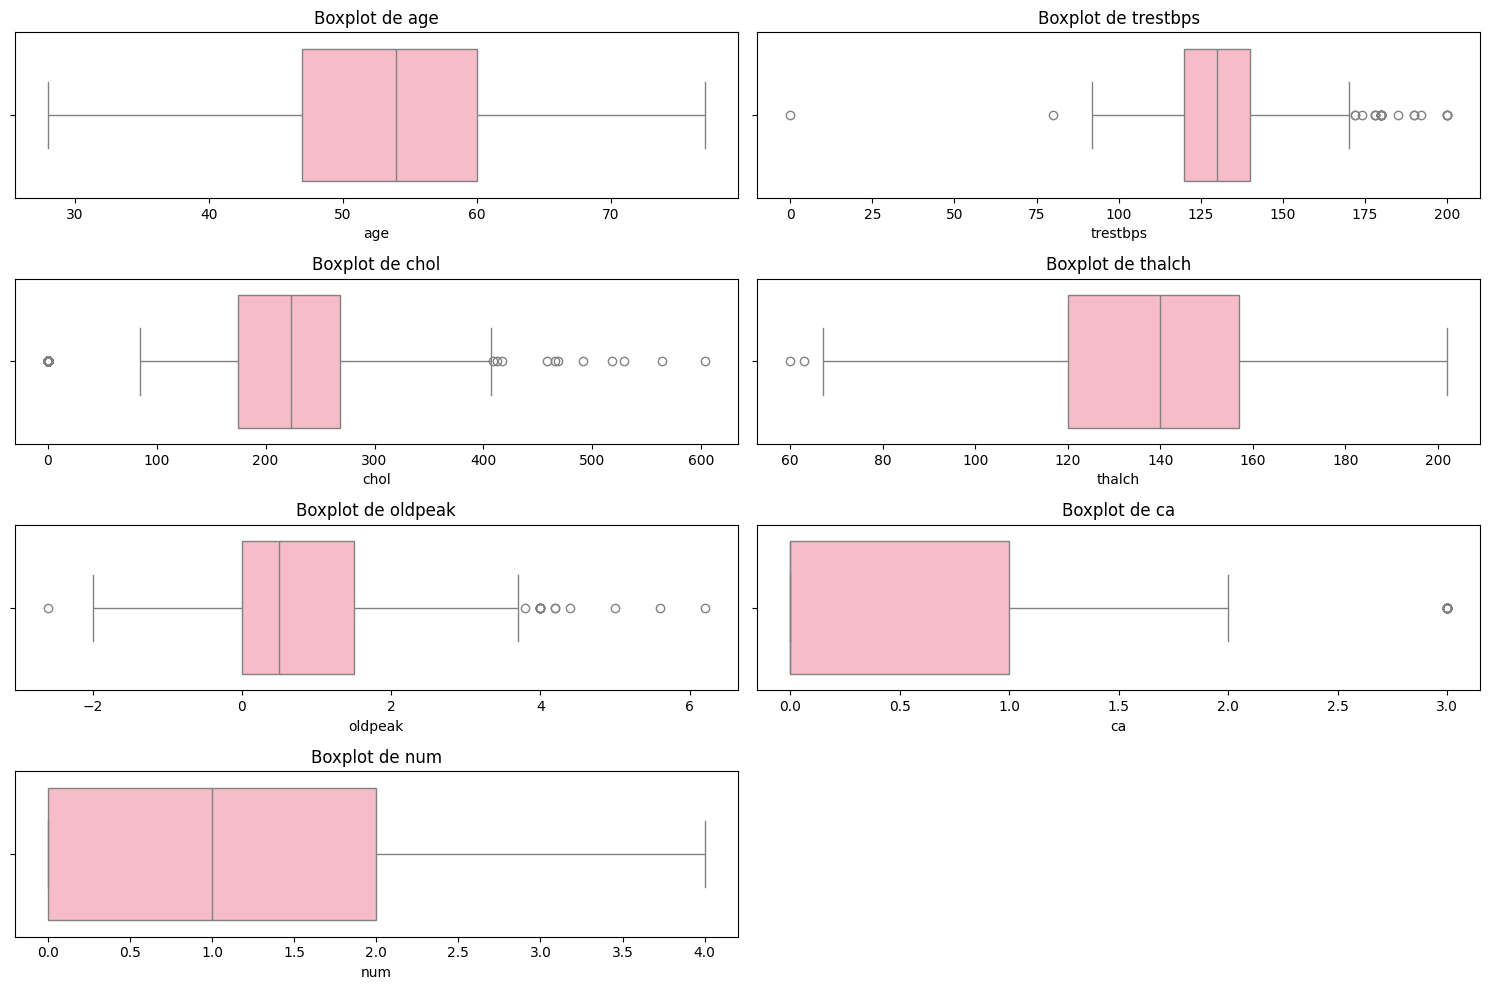

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = r'C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\heart_disease_uci.csv'
data = pd.read_csv(file_path)

# Eliminar columnas irrelevantes para el análisis
columns_to_drop = ["id"]  # Agregar más columnas irrelevantes si es necesario
data.drop(columns=columns_to_drop, inplace=True)
print(f"Columnas eliminadas: {columns_to_drop}")

# Exploración inicial del dataset
print("\n--- Exploración Inicial del Dataset ---")
print(f"Shape del dataset: {data.shape}")
print("\nPrimeras filas del dataset:")
print(data.head())
print("\nInformación del dataset:")
print(data.info())
print("\nDescripción estadística del dataset:")
print(data.describe())

# Identificar valores faltantes
print("\n--- Valores Faltantes ---")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Identificar filas duplicadas
print("\n--- Identificación de Filas Duplicadas ---")
duplicate_rows = data.duplicated().sum()
print(f"Número de filas duplicadas: {duplicate_rows}")

# Identificar valores únicos para variables categóricas
print("\n--- Variables Categóricas y Valores Únicos ---")
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

# Identificar outliers en variables numéricas
print("\n--- Identificación de Outliers ---")
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 2, 2, i)
    sns.boxplot(data=data, x=col, color="#ffb3c1")
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()


In [2]:
# --- Identificar NaN en las columnas categóricas ---

# Seleccionar columnas categóricas
categorical_columns = data.select_dtypes(include=["object", "category"]).columns

# Verificar si hay valores nulos en las columnas categóricas
print("\n--- Valores Nulos en Variables Categóricas ---")
if not categorical_columns.empty:
    nan_counts = data[categorical_columns].isnull().sum()
    print(nan_counts[nan_counts > 0])  # Mostrar solo las columnas con valores nulos
    if nan_counts.sum() == 0:
        print("No hay valores nulos en las variables categóricas.")
else:
    print("No hay variables categóricas en el dataset.")



--- Valores Nulos en Variables Categóricas ---
fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64


In [3]:
# --- Identificación y Eliminación de Filas ---

# Definir un umbral para el número mínimo de valores no nulos por fila
threshold = 0.25 
min_non_null_required = int(data.shape[1] * (1 - threshold))

print(f"\n--- Eliminación de Filas con Menos del {min_non_null_required} Valores No Nulos ---")
print(f"Umbral: Las filas deben tener al menos {min_non_null_required} valores no nulos.")

# Eliminar filas con menos valores no nulos que el umbral
original_shape = data.shape
data = data.dropna(thresh=min_non_null_required)

# Confirmar cambios
print(f"Tamaño original del dataset: {original_shape}")
print(f"Tamaño del dataset después de eliminar filas: {data.shape}")


--- Eliminación de Filas con Menos del 11 Valores No Nulos ---
Umbral: Las filas deben tener al menos 11 valores no nulos.
Tamaño original del dataset: (920, 15)
Tamaño del dataset después de eliminar filas: (863, 15)


In [4]:
# --- Tratamiento de Valores Faltantes en Columnas Categóricas ---
from sklearn.impute import SimpleImputer

# Seleccionar columnas categóricas
categorical_columns = data.select_dtypes(include=["object", "category"]).columns

print("\n--- Tratamiento de Valores Faltantes en Variables Categóricas ---")
for col in categorical_columns:
    missing_count = data[col].isnull().sum()
    if missing_count > 0:
        print(f"Columna '{col}' tiene {missing_count} valores nulos.")
        
        # Estrategia para imputar valores faltantes:
        # Si más del 5% de los valores son nulos, reemplazar con "No disponible"
        if missing_count / len(data) > 0.05:
            data[col] = data[col].fillna("No disponible")
            print(f"Se reemplazaron valores nulos en '{col}' con 'No disponible'.")
        
        # Si menos del 5% son nulos, reemplazar con la moda
        else:
            mode_value = data[col].mode()[0]
            data[col] = data[col].fillna(mode_value)
            print(f"Se reemplazaron valores nulos en '{col}' con la moda: '{mode_value}'.")
    else:
        print(f"La columna '{col}' no tiene valores nulos.")

# Confirmar que no quedan valores nulos en las columnas categóricas
print("\n--- Verificación Final de Valores Nulos ---")
print(data[categorical_columns].isnull().sum())


--- Tratamiento de Valores Faltantes en Variables Categóricas ---
La columna 'sex' no tiene valores nulos.
La columna 'dataset' no tiene valores nulos.
La columna 'cp' no tiene valores nulos.
Columna 'fbs' tiene 88 valores nulos.
Se reemplazaron valores nulos en 'fbs' con 'No disponible'.
Columna 'restecg' tiene 2 valores nulos.
Se reemplazaron valores nulos en 'restecg' con la moda: 'normal'.
La columna 'exang' no tiene valores nulos.
Columna 'slope' tiene 253 valores nulos.
Se reemplazaron valores nulos en 'slope' con 'No disponible'.
Columna 'thal' tiene 432 valores nulos.
Se reemplazaron valores nulos en 'thal' con 'No disponible'.

--- Verificación Final de Valores Nulos ---
sex        0
dataset    0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64


In [5]:
# --- Tratamiento de Valores Faltantes en Columnas Numéricas ---
from sklearn.impute import SimpleImputer

# Seleccionar columnas numéricas
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Crear un imputador para cada estrategia
mean_imputer = SimpleImputer(strategy="mean")  # Imputar con la media
median_imputer = SimpleImputer(strategy="median")  # Imputar con la mediana

print("\n--- Tratamiento de Valores Faltantes en Variables Numéricas ---")
for col in numerical_columns:
    missing_count = data[col].isnull().sum()
    if missing_count > 0:
        print(f"Columna '{col}' tiene {missing_count} valores nulos.")
        
        # Estrategia de imputación:
        # Si la desviación estándar es alta, usar la mediana (menos afectada por outliers)
        if data[col].std() / data[col].mean() > 0.1:
            data[col] = median_imputer.fit_transform(data[[col]])
            print(f"Se reemplazaron valores nulos en '{col}' con la mediana.")
        else:
            data[col] = mean_imputer.fit_transform(data[[col]])
            print(f"Se reemplazaron valores nulos en '{col}' con la media.")
    else:
        print(f"La columna '{col}' no tiene valores nulos.")

# Confirmar que no quedan valores nulos en las columnas numéricas
print("\n--- Verificación Final de Valores Nulos ---")
print(data[numerical_columns].isnull().sum())



--- Tratamiento de Valores Faltantes en Variables Numéricas ---
La columna 'age' no tiene valores nulos.
Columna 'trestbps' tiene 3 valores nulos.
Se reemplazaron valores nulos en 'trestbps' con la mediana.
Columna 'chol' tiene 27 valores nulos.
Se reemplazaron valores nulos en 'chol' con la mediana.
La columna 'thalch' no tiene valores nulos.
Columna 'oldpeak' tiene 6 valores nulos.
Se reemplazaron valores nulos en 'oldpeak' con la mediana.
Columna 'ca' tiene 554 valores nulos.
Se reemplazaron valores nulos en 'ca' con la mediana.
La columna 'num' no tiene valores nulos.

--- Verificación Final de Valores Nulos ---
age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
num         0
dtype: int64


In [6]:
# Estadísticas Descriptivas
# Variables categóricas
categorical_columns = data.select_dtypes(include=["object", "category"]).columns
print("\n--- Estadísticas Descriptivas para Variables Categóricas ---")
if not categorical_columns.empty:
    print(data[categorical_columns].describe().transpose())
else:
    print("No hay variables categóricas en el dataset.")

# Variables numéricas
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
print("\n--- Estadísticas Descriptivas para Variables Numéricas ---")
if not numerical_columns.empty:
    print(data[numerical_columns].describe().transpose())
else:
    print("No hay variables numéricas en el dataset.")


--- Estadísticas Descriptivas para Variables Categóricas ---
        count unique            top freq
sex       863      2           Male  671
dataset   863      4      Cleveland  304
cp        863      4   asymptomatic  468
fbs       863      3          False  658
restecg   863      3         normal  532
exang     863      2          False  528
slope     863      4           flat  345
thal      863      4  No disponible  432

--- Estadísticas Descriptivas para Variables Numéricas ---
          count        mean         std   min    25%    50%    75%    max
age       863.0   53.157590    9.383463  28.0   46.0   54.0   60.0   77.0
trestbps  863.0  132.168019   19.002278   0.0  120.0  130.0  140.0  200.0
chol      863.0  200.516802  108.951784   0.0  179.0  224.0  266.0  603.0
thalch    863.0  137.618772   25.885917  60.0  120.0  140.0  157.0  202.0
oldpeak   863.0    0.874855    1.087838  -2.6    0.0    0.5    1.5    6.2
ca        863.0    0.242178    0.646591   0.0    0.0    0.0    0.

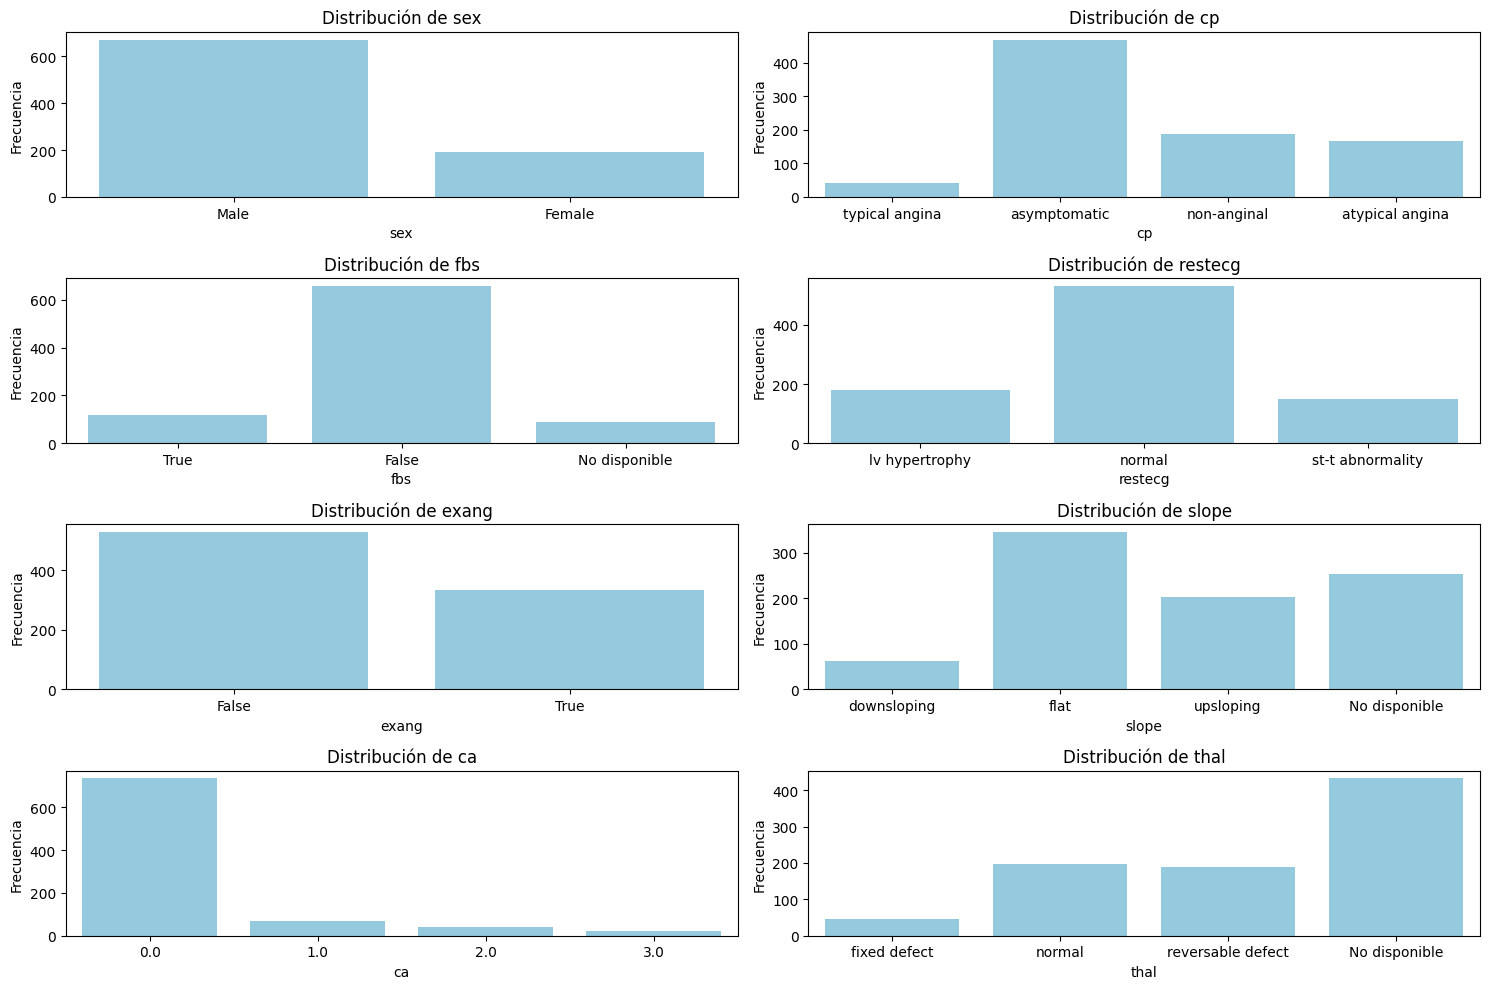

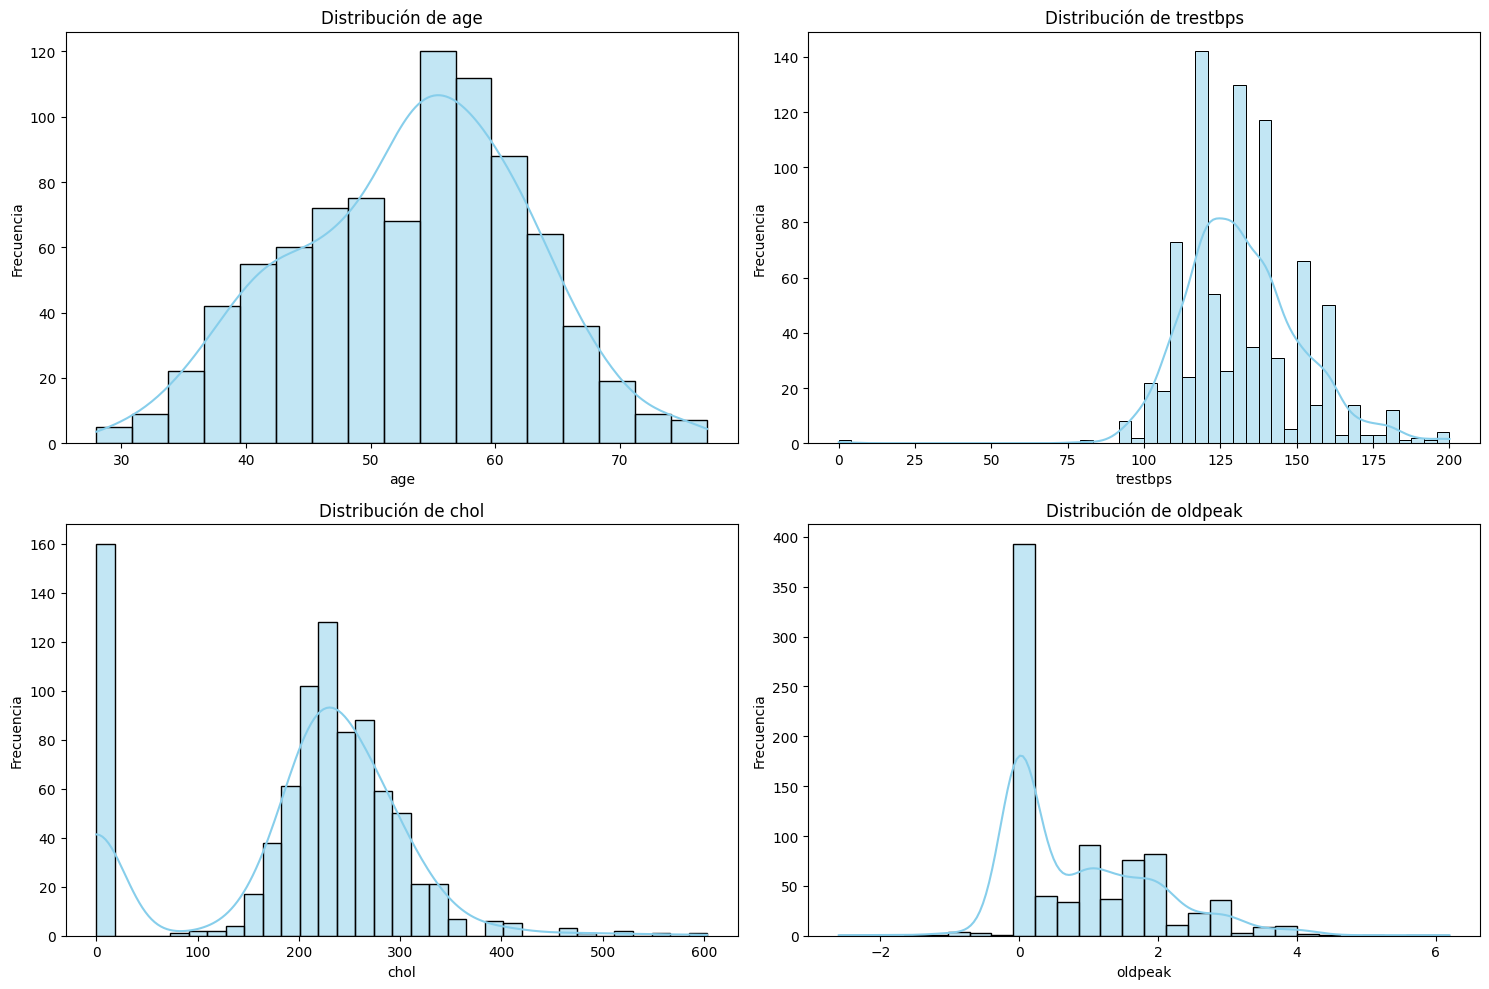


--- Correlaciones con la Variable 'num' ---
num         1.000000
oldpeak     0.441559
age         0.346617
ca          0.283540
trestbps    0.123179
chol       -0.252935
thalch     -0.365245
Name: num, dtype: float64


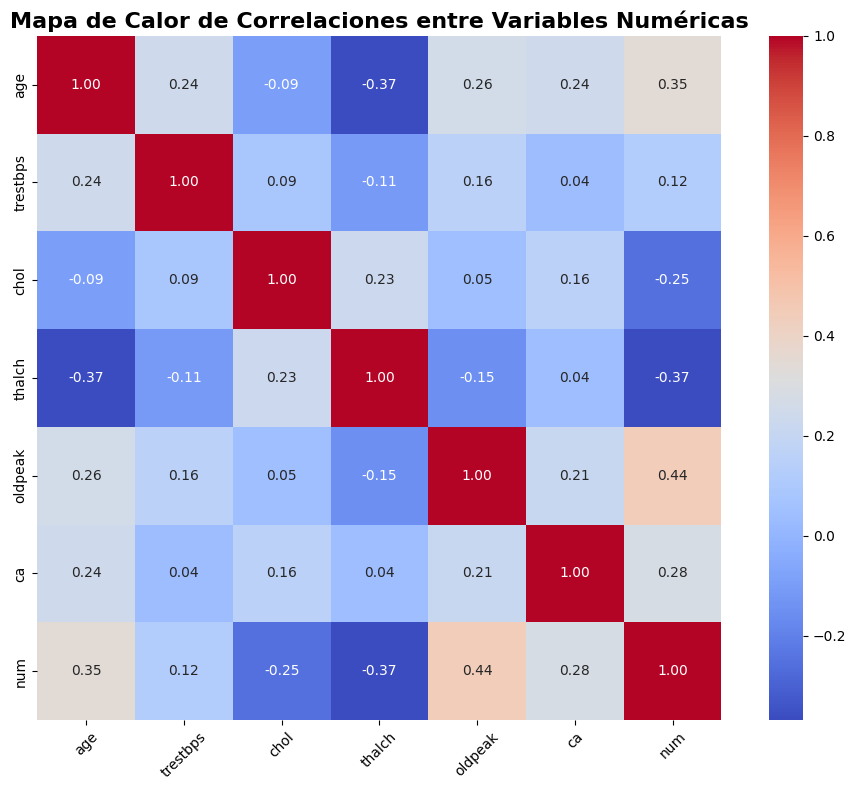

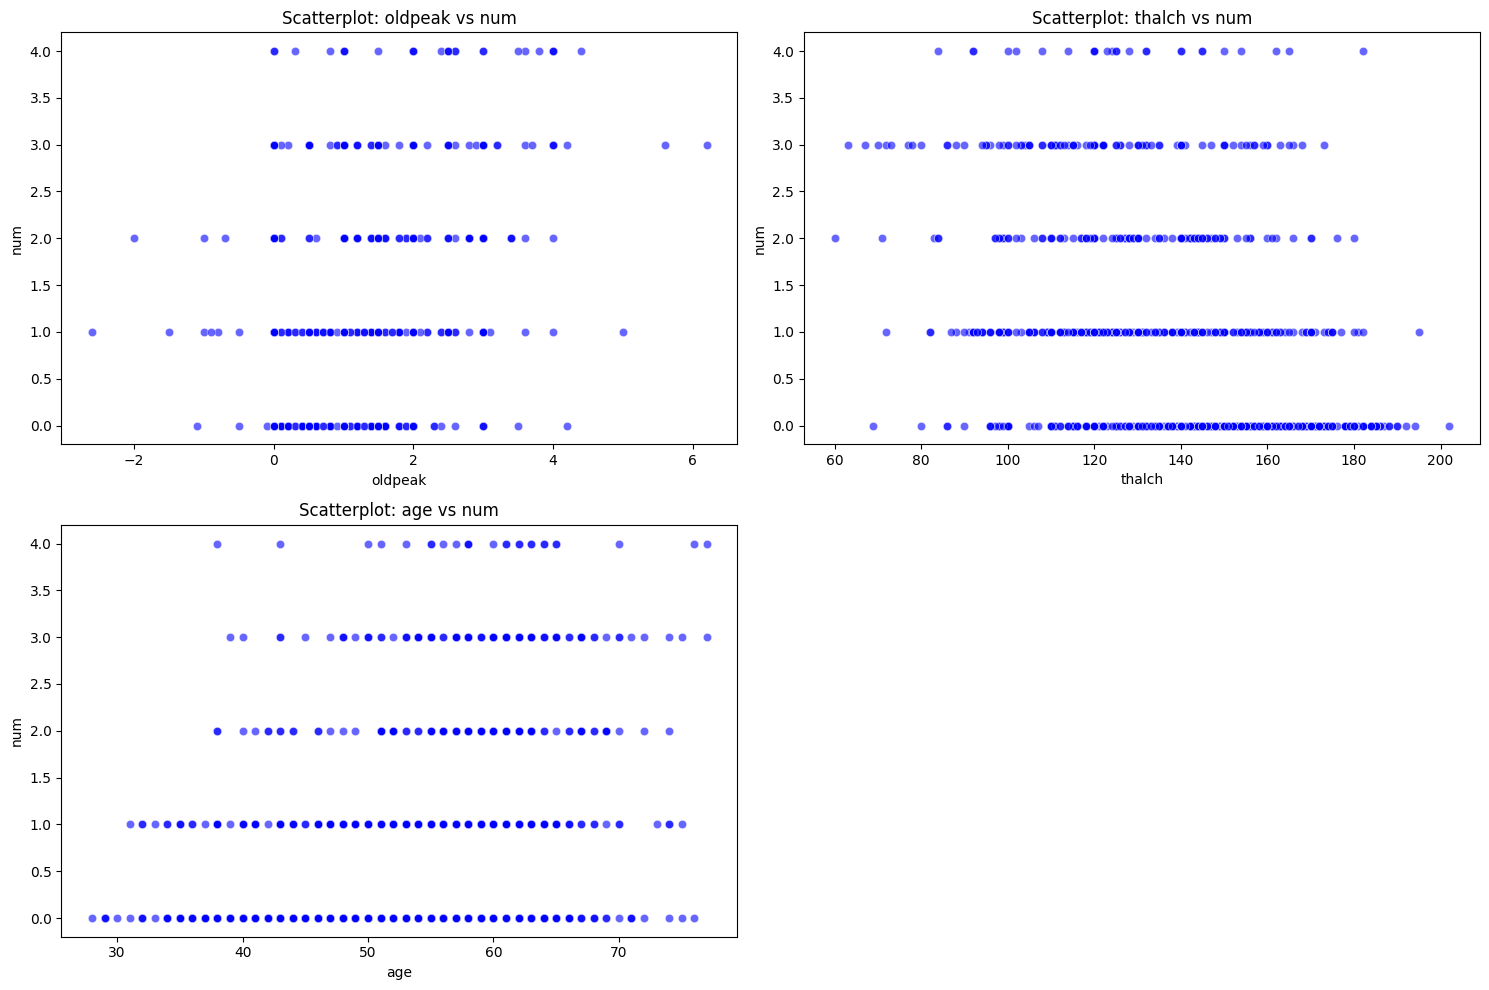

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Validar las columnas numéricas y categóricas ---
# Asegurarse de que las columnas seleccionadas existen en el dataset limpio
numerical_columns = [
    col for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] if col in data.columns
]
categorical_columns = [
    col for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] if col in data.columns
]

# Visualizaciones para variables categóricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot((len(categorical_columns) + 1) // 2, 2, i)  # 2 gráficos por fila
    sns.countplot(data=data, x=col, color="skyblue")  # Eliminado el uso de palette
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# Visualizaciones para variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 1) // 2, 2, i)  # 2 gráficos por fila
    sns.histplot(data=data, x=col, kde=True, color="skyblue")  # Eliminado el uso de palette
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# --- Análisis Multivariado ---
# Filtrar únicamente las columnas numéricas
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Calcular la matriz de correlación utilizando únicamente las variables numéricas
correlation_matrix = data[numerical_columns].corr()

# Mostrar las correlaciones con la variable objetivo 'num'
print("\n--- Correlaciones con la Variable 'num' ---")
if 'num' in correlation_matrix.columns:
    num_correlations = correlation_matrix["num"].sort_values(ascending=False)
    print(num_correlations)
else:
    print("La columna 'num' no está presente en las variables numéricas.")

# Visualizar el mapa de calor de las correlaciones numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    cbar=True,
)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filtrar correlaciones altas con la variable objetivo 'num'
threshold = 0.3  # Ajusta el umbral según lo necesario
correlated_features = correlation_matrix["num"].abs().sort_values(ascending=False)
highly_correlated = correlated_features[correlated_features > threshold].index
highly_correlated = highly_correlated.drop("num")  # Excluir 'num' de la lista

# Crear scatterplots para las variables con alta correlación

plt.figure(figsize=(15, 10))
for i, col in enumerate(highly_correlated, 1):
    plt.subplot(len(highly_correlated) // 2 + len(highly_correlated) % 2, 2, i)
    sns.scatterplot(data=data, x=col, y="num", color="blue", alpha=0.6)
    plt.title(f"Scatterplot: {col} vs num")
    plt.xlabel(col)
    plt.ylabel("num")
plt.tight_layout()
plt.show()


In [8]:
# Preprocesamiento de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, confusion_matrix
)  
from sklearn.model_selection import GridSearchCV  
from xgboost import XGBClassifier 

# --- Codificación One-Hot para Variables Categóricas ---
print("\n--- Codificación One-Hot para Variables Categóricas ---")

# Seleccionar columnas categóricas
categorical_columns = data.select_dtypes(include=["object", "category"]).columns

if not categorical_columns.empty:
    print(f"Columnas categóricas a codificar: {categorical_columns.tolist()}")

    # Convertir todas las columnas categóricas a string (por seguridad)
    data[categorical_columns] = data[categorical_columns].astype(str)

    # Aplicar One-Hot Encoding utilizando pd.get_dummies
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

    # Confirmar la forma del dataset después de codificación
    print(f"Dataset después de codificar: {data.shape}")
else:
    print("No hay variables categóricas para codificar.")

# Confirmar que no hay valores nulos después de la codificación
if data.isnull().sum().sum() > 0:
    print("\nAdvertencia: Existen valores nulos después de la codificación.")
else:
    print("\nDataset limpio y codificado correctamente.")


--- Codificación One-Hot para Variables Categóricas ---
Columnas categóricas a codificar: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Dataset después de codificar: (863, 25)

Dataset limpio y codificado correctamente.


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- División del Conjunto de Datos ---
print("\n--- División del Conjunto de Datos ---")

# Variables predictoras (X) y objetivo (y)
X = data.drop(columns=["num"])  # Excluir la columna objetivo
y = data["num"]  # Columna objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar únicamente las columnas numéricas
numerical_columns = X.select_dtypes(include=["float64", "int64"]).columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# --- Binarización de la Variable Objetivo ---
print("\n--- Binarización de la Variable Objetivo ---")
y_train_binarized = (y_train > 0).astype(int)  # 1 si hay enfermedad, 0 si no
y_test_binarized = (y_test > 0).astype(int)

print(f"Distribución en el conjunto de entrenamiento:\n{y_train_binarized.value_counts()}")
print(f"Distribución en el conjunto de prueba:\n{y_test_binarized.value_counts()}")

# --- Evaluación Inicial del Modelo ---
print("\n--- Evaluación Inicial del Modelo: XGBoost ---")
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train_binarized)

# Predicciones iniciales
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probabilidades para ROC-AUC

# Métricas iniciales
accuracy = accuracy_score(y_test_binarized, y_pred)
precision = precision_score(y_test_binarized, y_pred)
recall = recall_score(y_test_binarized, y_pred)
f1 = f1_score(y_test_binarized, y_pred)
roc_auc = roc_auc_score(y_test_binarized, y_prob)

print(f"Exactitud: {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test_binarized, y_pred)
print("\nMatriz de Confusión:")
print(conf_matrix)

# --- Optimización de Hiperparámetros con GridSearchCV ---
print("\n--- Optimización de Hiperparámetros con GridSearchCV ---")

# Definir el espacio de búsqueda
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 particiones
    scoring='accuracy',  # Métrica de evaluación
    verbose=1
)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train_binarized)

# Obtener los mejores parámetros
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("\nMejores hiperparámetros encontrados:")
print(best_params)

# --- Evaluación del Modelo Optimizado ---
print("\n--- Evaluación del Modelo Optimizado ---")

# Predicciones con el modelo optimizado
y_pred_optimized = best_xgb_model.predict(X_test)
y_prob_optimized = best_xgb_model.predict_proba(X_test)[:, 1]

# Métricas del modelo optimizado
accuracy_optimized = accuracy_score(y_test_binarized, y_pred_optimized)
precision_optimized = precision_score(y_test_binarized, y_pred_optimized)
recall_optimized = recall_score(y_test_binarized, y_pred_optimized)
f1_optimized = f1_score(y_test_binarized, y_pred_optimized)
roc_auc_optimized = roc_auc_score(y_test_binarized, y_prob_optimized)

print(f"Exactitud: {accuracy_optimized:.4f}")
print(f"Precisión: {precision_optimized:.4f}")
print(f"Recall: {recall_optimized:.4f}")
print(f"F1-Score: {f1_optimized:.4f}")
print(f"ROC-AUC: {roc_auc_optimized:.4f}")

# Matriz de confusión del modelo optimizado
conf_matrix_optimized = confusion_matrix(y_test_binarized, y_pred_optimized)
print("\nMatriz de Confusión del Modelo Optimizado:")
print(conf_matrix_optimized)


--- División del Conjunto de Datos ---

--- Binarización de la Variable Objetivo ---
Distribución en el conjunto de entrenamiento:
num
1    330
0    274
Name: count, dtype: int64
Distribución en el conjunto de prueba:
num
1    142
0    117
Name: count, dtype: int64

--- Evaluación Inicial del Modelo: XGBoost ---
Exactitud: 0.8069
Precisión: 0.8194
Recall: 0.8310
F1-Score: 0.8252
ROC-AUC: 0.8651

Matriz de Confusión:
[[ 91  26]
 [ 24 118]]

--- Optimización de Hiperparámetros con GridSearchCV ---
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Mejores hiperparámetros encontrados:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

--- Evaluación del Modelo Optimizado ---
Exactitud: 0.8456
Precisión: 0.8446
Recall: 0.8803
F1-Score: 0.8621
ROC-AUC: 0.8983

Matriz de Confusión del Modelo Optimizado:
[[ 94  23]
 [ 17 125]]



--- Curva ROC del Modelo Optimizado ---


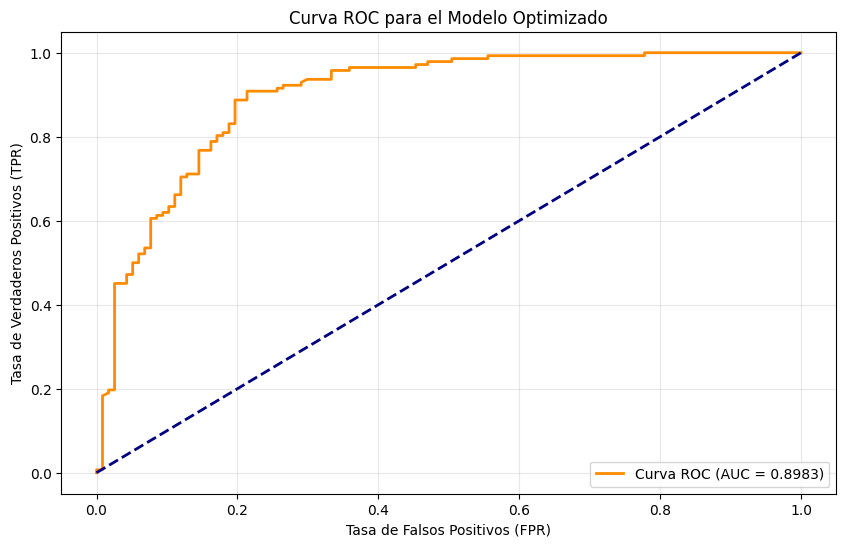


--- Importancia de las Características ---


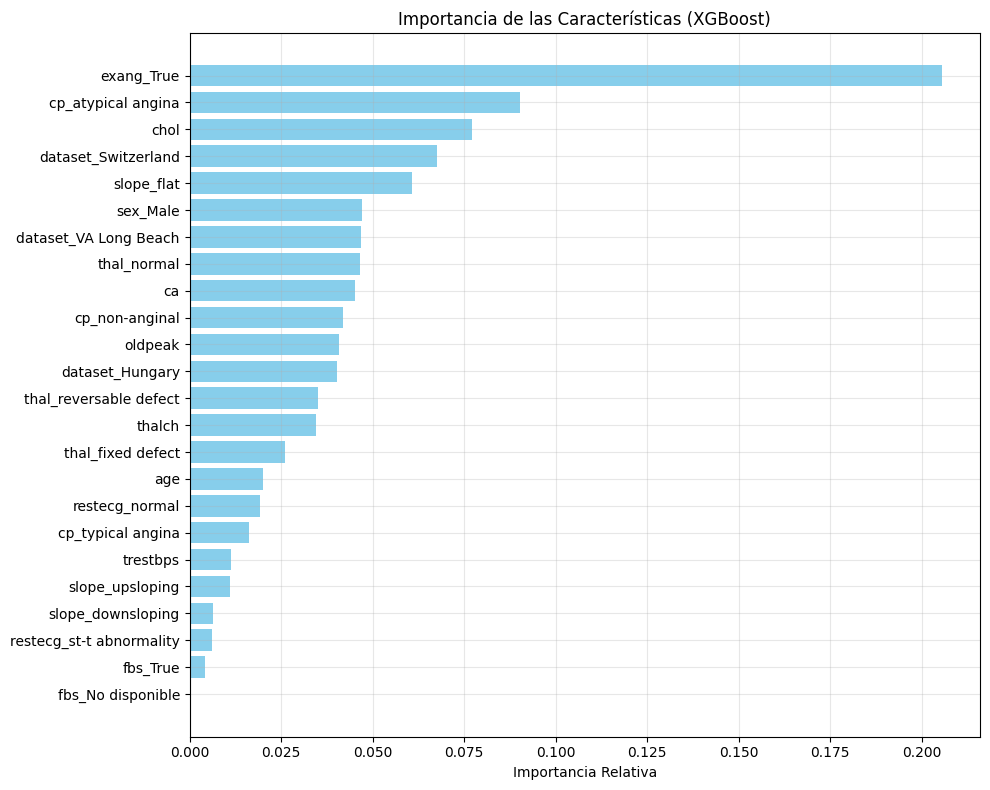


--- Matriz de Confusión del Modelo Optimizado (Heatmap) ---


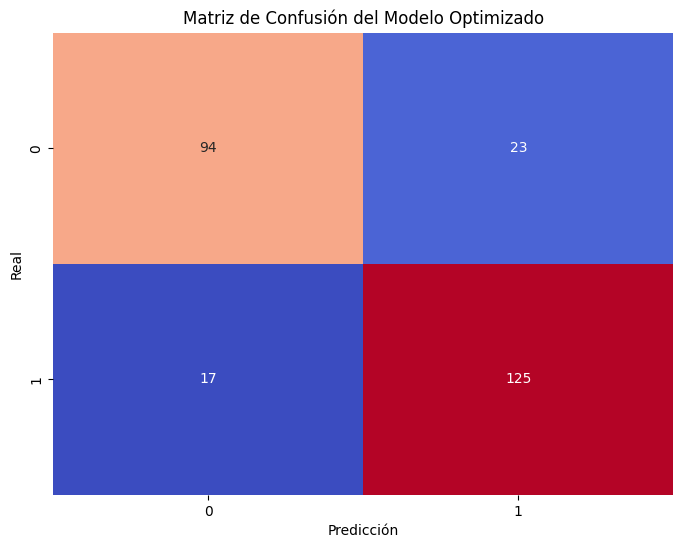


--- Comparación de Métricas entre Modelos ---


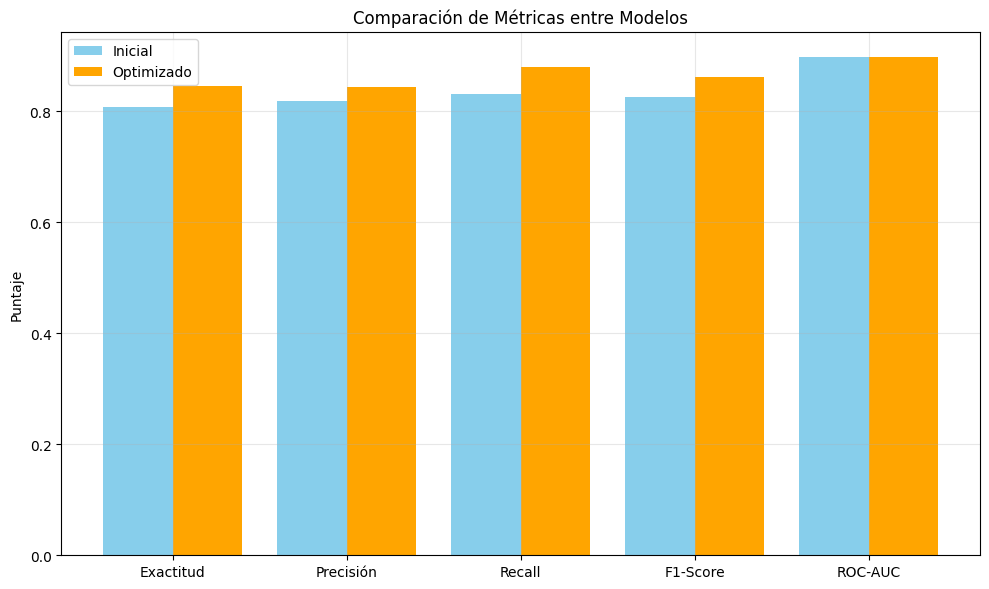

In [19]:
# --- Curva ROC del Modelo Optimizado ---
print("\n--- Curva ROC del Modelo Optimizado ---")

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_binarized, y_prob_optimized)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"Curva ROC (AUC = {roc_auc_optimized:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC para el Modelo Optimizado")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# --- Importancia de las Características ---
print("\n--- Importancia de las Características ---")

feature_importances = best_xgb_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color='skyblue')
plt.xlabel("Importancia Relativa")
plt.title("Importancia de las Características (XGBoost)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Heatmap de la Matriz de Confusión ---
print("\n--- Matriz de Confusión del Modelo Optimizado (Heatmap) ---")

plt.figure(figsize=(8, 6))
conf_matrix_plt = sns.heatmap(conf_matrix_optimized, annot=True, fmt="d", cmap="coolwarm", cbar=False)
conf_matrix_plt.set_title("Matriz de Confusión del Modelo Optimizado")
conf_matrix_plt.set_xlabel("Predicción")
conf_matrix_plt.set_ylabel("Real")
plt.show()

# --- Comparación de Métricas entre Modelos ---
print("\n--- Comparación de Métricas entre Modelos ---")

metrics = ["Exactitud", "Precisión", "Recall", "F1-Score", "ROC-AUC"]
initial_values = [accuracy, precision, recall, f1, roc_auc]
optimized_values = [accuracy_optimized, precision_optimized, recall_optimized, f1_optimized, roc_auc_optimized]

x = range(len(metrics))
plt.figure(figsize=(10, 6))
plt.bar(x, initial_values, width=0.4, label="Inicial", align="center", color="skyblue")
plt.bar([i + 0.4 for i in x], optimized_values, width=0.4, label="Optimizado", align="center", color="orange")
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylabel("Puntaje")
plt.title("Comparación de Métricas entre Modelos")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Análisis General del Dataset:**

El dataset muestra una combinación de variables numéricas y categóricas relacionadas con enfermedades cardíacas.
La variable objetivo num se binarizó para representar la presencia o ausencia de enfermedad cardíaca, facilitando su uso en algoritmos como XGBoost.
Algunas columnas irrelevantes (e.g., id) fueron eliminadas para evitar ruido en el modelo.
Desempeño del Modelo Inicial:

El modelo XGBoost inicial logró un buen desempeño, con métricas satisfactorias como ROC-AUC, precisión y recall. Esto sugiere que XGBoost es adecuado para este tipo de datos al manejar eficientemente relaciones no lineales y valores faltantes.
Sin embargo, las métricas iniciales mostraron margen de mejora, especialmente en el recall, que es crítico en este contexto para minimizar falsos negativos (es decir, no diagnosticar pacientes enfermos como sanos).

**Optimización del Modelo:**

La optimización de hiperparámetros utilizando GridSearchCV mejoró significativamente las métricas de rendimiento.
El uso de parámetros como n_estimators, max_depth, y learning_rate ajustados en el modelo optimizado permitió alcanzar un balance adecuado entre bias y varianza.
El ROC-AUC del modelo optimizado confirmó una mejora notable en la capacidad del modelo para distinguir entre clases.

**Evaluación de XGBoost:**

- **Ventajas:**
XGBoost es extremadamente eficiente en términos computacionales y tiene técnicas incorporadas para manejar overfitting, como regularización L1/L2 y subsampling.
Funciona bien con datos con características numéricas y categóricas, especialmente después de un preprocesamiento adecuado.
- **Desventajas:**
Puede ser propenso al overfitting en datasets pequeños, especialmente si no se ajustan correctamente los hiperparámetros.
Requiere un cuidado especial en la preparación de los datos (e.g., eliminación de columnas irrelevantes, manejo de valores faltantes) para evitar problemas durante el entrenamiento.

**Posibles Mejoras:**

- **Recolección de Datos:**
Ampliar el tamaño del dataset podría mejorar la capacidad del modelo para generalizar a nuevos datos.
Feature Engineering:
Explorar combinaciones o transformaciones de variables que podrían capturar relaciones no evidentes.

- **Validación:**
Implementar validación cruzada estratificada para evitar problemas de desequilibrio de clases en los conjuntos de entrenamiento y prueba.
Ensamblado de Modelos:
Combinar XGBoost con otros algoritmos como Random Forest o LightGBM podría mejorar el desempeño general.
Uso de Técnicas de Interpretabilidad:
Implementar técnicas como SHAP o LIME para entender mejor las decisiones del modelo y garantizar su aplicabilidad en contextos médicos críticos.

**Conclusión Final:**

XGBoost demostró ser una elección adecuada para este dataset debido a su capacidad para manejar datos tabulares complejos. Sin embargo, la interpretabilidad es crucial en aplicaciones médicas, lo que sugiere que sería útil complementar este análisis con modelos explicativos o herramientas de visualización.
Las mejoras logradas en la optimización resaltan la importancia de un enfoque iterativo en Machine Learning, desde la preparación de datos hasta el ajuste de hiperparámetros.